# First: explore the data
* Are there any data quality issues present?
* Are there any fields that are challenging to understand?

## Data Loading

In [9]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
# Data Loading
User = pd.read_csv('USER_TAKEHOME.csv')
Transaction = pd.read_csv('TRANSACTION_TAKEHOME.csv')
Product = pd.read_csv('PRODUCTS_TAKEHOME.csv')

## Overview of each data set

### Overview - User

In [11]:
# Quick look of User data
User.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [13]:
# Show the User infomation
User.info()
## There are null values in 4 columns.(BIRTH_DATE, STATE, LANGUAGE, GENDER)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


In [14]:
# User: ID
## Calculate the number of unique USER_ID, checking if there is duplicate USER_ID
User['ID'].nunique()
## ID in User has no duplicate. 100000 users in this table

100000

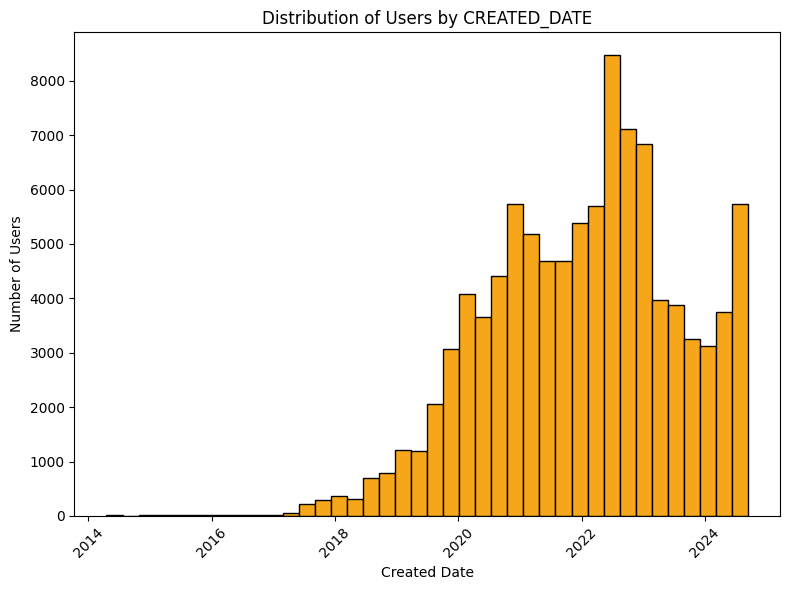

In [129]:
# User: CREATED_DATE
# Create a copy for User
User_copy = User.copy()
## Convert CREATED_DATE to datetime format
User_copy['CREATED_DATE'] = pd.to_datetime(User_copy['CREATED_DATE'])

## Create a histogram to show the distribution of user creation dates based on each quarter
plt.figure(figsize=(8, 6))
plt.hist(User_copy['CREATED_DATE'].dt.date, bins=40, color='#f8a619', edgecolor='black')
plt.title('Distribution of Users by CREATED_DATE')
plt.xlabel('Created Date')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()

## Show the plot
plt.show()

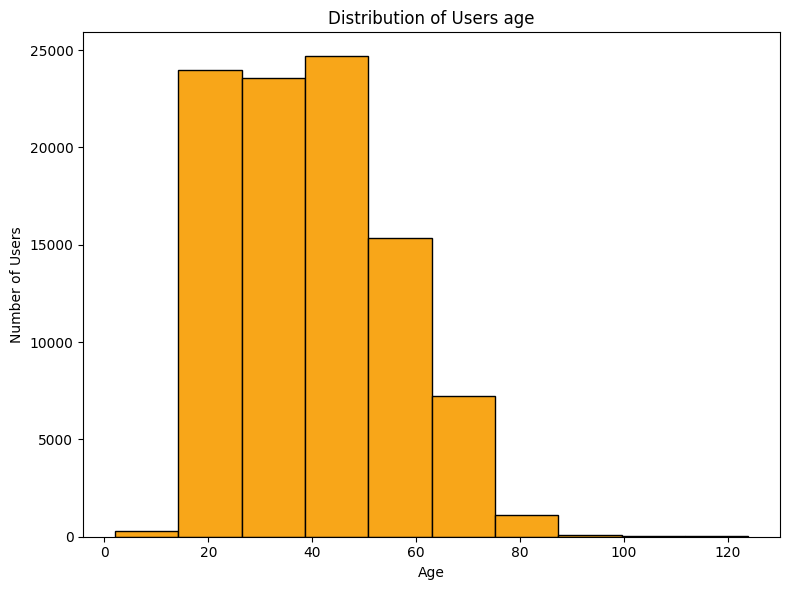

In [144]:
# User: BIRTH_DATE
# import datetime
from datetime import datetime

# Convert BIRTH_DATE to datetime
User_copy['BIRTH_DATE'] = pd.to_datetime(User_copy['BIRTH_DATE'])

# Calculate age correctly as an integer
User_copy['AGE'] = datetime.now().year - User_copy['BIRTH_DATE'].dt.year

## Create a histogram to show the distribution of user age
plt.figure(figsize=(8, 6))
plt.hist(User_copy['AGE'], color='#f8a619', edgecolor='black')
plt.title('Distribution of Users age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.tight_layout()

## Show the plot
plt.show()

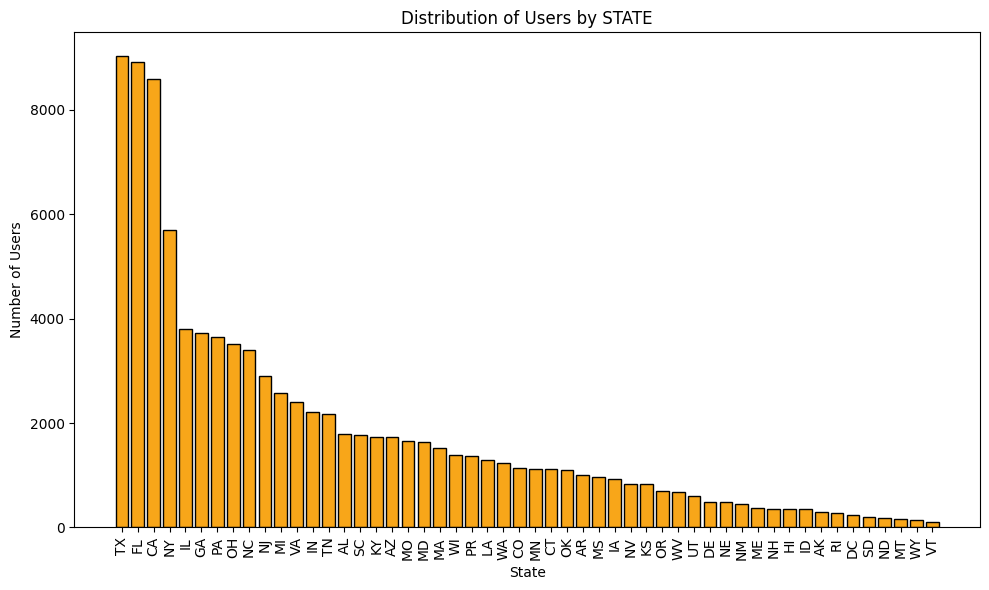

In [98]:
# User: STATE
## Calculate the number of uses in each state
state_counts = User_copy['STATE'].value_counts()

## Create a bar chart to show the distribution of users by STATE
# Compare to the real population distribution: https://worldpopulationreview.com/states
# The rank of numbers of users in each state shows in User dataset shows consistency comparing with the real population in each states
plt.figure(figsize=(10, 6))
plt.bar(state_counts.index, state_counts.values, color='#f8a619', edgecolor='black')
plt.title('Distribution of Users by STATE')
plt.xlabel('State')
plt.ylabel('Number of Users')
plt.xticks(rotation=90)
plt.tight_layout()

## Show the plot
plt.show()

LANGUAGE
en        63403
es-419     6089
Name: count, dtype: int64


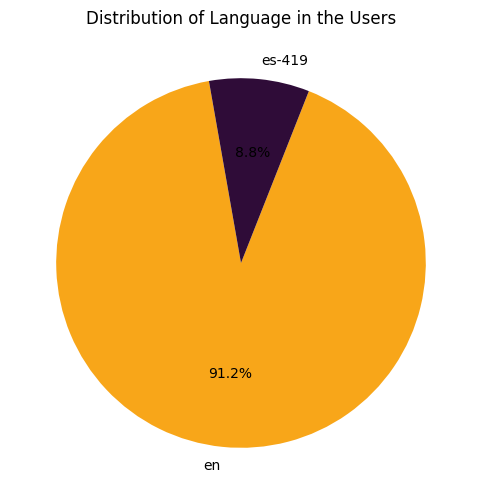

In [99]:
# User: LANGUAGE
## Count the occurrences of each gender
language_counts = User_copy['LANGUAGE'].value_counts()
print(language_counts)

## Use the Fetch colors 
## Fetch Color Reference: https://logotyp.us/logo/fetch-rewards/
colors = ['#f8a619', '#2f0c38']

## Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=100, colors=colors)
plt.title('Distribution of Language in the Users')

## Show the plot
plt.show()

GENDER
female                    64240
male                      25829
transgender                1772
prefer_not_to_say          1350
non_binary                  473
unknown                     196
not_listed                  180
Non-Binary                   34
not_specified                28
My gender isn't listed        5
Prefer not to say             1
Name: count, dtype: int64


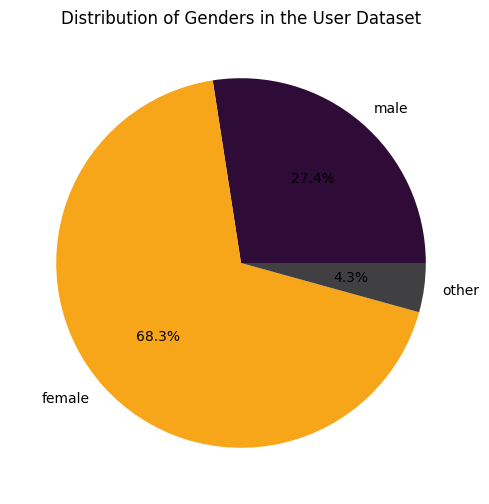

In [100]:
# User: GENDER
## Count the occurrences of each gender
gender_counts = User_copy['GENDER'].value_counts()
print(gender_counts) # There is 'unknown' type also shows in GENDER, which should be considered as missing value, and needed to be figured out.

## Group all types except 'male' and 'female' into 'Other'
gender_counts['other'] = gender_counts.drop(['male', 'female']).sum()
gender_counts = gender_counts[['male', 'female', 'other']]

## Use the Fetch colors 
colors = ['#2f0c38', '#f8a619', '#403f41']

## Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=0, colors=colors)
plt.title('Distribution of Genders in the User Dataset')

## Show the plot
plt.show()

### Overview - Transaction

In [20]:
# Quick look of Transaction data
Transaction.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [21]:
# Show the Transaction infomation
Transaction.info()
## Null values in BARCODE column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


In [22]:
# Transaction: RECEIPT_ID
## Calculate the unique number of RECEIPT_ID
Transaction['RECEIPT_ID'].nunique() 

## Count occurrences of each RECEIPT_ID
receipt_id_counts = Transaction['RECEIPT_ID'].value_counts()

## Filter for RECEIPT_IDs that have duplicates (count > 1)
receipt_id_duplicate = receipt_id_counts[receipt_id_counts > 1]

## Convert to a DataFrame which shows the DUPLICATE_COUNT for each duplicate RECEIPT_ID
receipt_id_duplicate_df = receipt_id_duplicate.reset_index()
receipt_id_duplicate_df.columns = ['RECEIPT_ID', 'DUPLICATE_COUNT']

## Display the DataFrame of duplicate RECEIPT_IDs
receipt_id_duplicate_df

## Transaction data has 50000 rows but has only 24440 unique RECEIPT_ID, which means there are 25560 duplicate RECEIPT_ID

,RECEIPT_ID,DUPLICATE_COUNT
0,bedac253-2256-461b-96af-267748e6cecf,12
1,bc304cd7-8353-4142-ac7f-f3ccec720cb3,8
2,4ec870d2-c39f-4a40-bf8a-26a079409b20,8
3,2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711,8
4,760c98da-5174-401f-a203-b839c4d406be,8
...,...,...
24435,56a368e6-d677-459d-ba05-70a886c3126b,2
24436,56a0e14c-187c-43ec-96ab-b67ac5c197f1,2
24437,569f4be9-63d1-4afd-8ed5-d520ce85b878,2
24438,56946262-15b1-41fd-8814-fc544d35fc6c,2


In [23]:
'''
# Transaction: PURCHASE_DATE & SCAN_DATE
## Calculate a new column which shows the difference between PURCHASE_DATE and SCAN_DATE
# Convert PURCHASE_DATE and SCAN_DATE to datetime format
Transaction['PURCHASE_DATE'] = pd.to_datetime(Transaction['PURCHASE_DATE'], errors='coerce')
Transaction['SCAN_DATE'] = pd.to_datetime(Transaction['SCAN_DATE'], errors='coerce')

# Calculate the time difference in hours
Transaction['TIME_DIFFERENCE'] = (Transaction['SCAN_DATE'] - Transaction['PURCHASE_DATE']).dt.date() / 3600

# Create bins for time differences
bins = [-float('inf'), 0, 1, 3, 6, 12, 24, float('inf')]
labels = ['Negative', '0-1 hours', '1-3 hours', '3-6 hours', '6-12 hours', '12-24 hours', 'More than 24 hours']

# Create a new column for the binned time difference
Transaction['TIME_DIFF_GROUP'] = pd.cut(Transaction['TIME_DIFFERENCE'], bins=bins, labels=labels)

# Count occurrences in each time difference group
time_diff_counts = Transaction['TIME_DIFF_GROUP'].value_counts().sort_index()

# Create a bar plot to show the distribution of time differences
plt.figure(figsize=(10, 6))
plt.bar(time_diff_counts.index, time_diff_counts.values, color='#f8a619', edgecolor='black')
plt.title('Distribution of Time Difference between PURCHASE_DATE and SCAN_DATE')
plt.xlabel('Time Difference Groups')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
'''

"\n# Transaction: PURCHASE_DATE & SCAN_DATE\n## Calculate a new column which shows the difference between PURCHASE_DATE and SCAN_DATE\n# Convert PURCHASE_DATE and SCAN_DATE to datetime format\nTransaction['PURCHASE_DATE'] = pd.to_datetime(Transaction['PURCHASE_DATE'], errors='coerce')\nTransaction['SCAN_DATE'] = pd.to_datetime(Transaction['SCAN_DATE'], errors='coerce')\n\n# Calculate the time difference in hours\nTransaction['TIME_DIFFERENCE'] = (Transaction['SCAN_DATE'] - Transaction['PURCHASE_DATE']).dt.date() / 3600\n\n# Create bins for time differences\nbins = [-float('inf'), 0, 1, 3, 6, 12, 24, float('inf')]\nlabels = ['Negative', '0-1 hours', '1-3 hours', '3-6 hours', '6-12 hours', '12-24 hours', 'More than 24 hours']\n\n# Create a new column for the binned time difference\nTransaction['TIME_DIFF_GROUP'] = pd.cut(Transaction['TIME_DIFFERENCE'], bins=bins, labels=labels)\n\n# Count occurrences in each time difference group\ntime_diff_counts = Transaction['TIME_DIFF_GROUP'].value_c

In [24]:
# Transaction: FINAL_QUANTITY
## Check the quantity entries are all numbers
unique_final_quantity_values = Transaction['FINAL_QUANTITY'].unique()
print(unique_final_quantity_values) ## string:'zero': shows in FINAL_QUANTITY

## Save the transactions which have 'zero' quantity in FINAL_QUANTITY as 'zero_quantity'
zero_quantity = Transaction[Transaction['FINAL_QUANTITY'] == 'zero']

## Check if 'zero_quantity' are all have duplicate enties
transactions_with_zero_quantity = Transaction[Transaction['RECEIPT_ID'].isin(zero_quantity['RECEIPT_ID'])]
receipt_counts = transactions_with_zero_quantity.groupby(['RECEIPT_ID', 'BARCODE']).size()

## Check if all counts are at least 2
at_least_twice = (receipt_counts >= 2).all()

## Show the results
print("Occurrences of each RECEIPT_ID:\n", receipt_counts)
print("All RECEIPT_IDs occur at least twice:", at_least_twice) # TRUE. It might implies there are some data entry issues

## The name is inconsistent with Entity Relationship Model (FINAL_QUANTITY & quantity)
## According to Entity Relationship Model, FINAL_QUANTITY should be numeric, but shows 'zero', which is a string.
## This might cause some inconsistent and calculation issues when doing calculations.
## Also, if the final_quantity is 0, then there might be redundancy in this data.
## Group by same RECEIPT_ID and BARCODE, those transaction with 'zero' quantity record also shows duplicate in RECEIPT_ID

['1.00' 'zero' '2.00' '3.00' '4.00' '4.55' '2.83' '2.34' '0.46' '7.00'
 '18.00' '12.00' '5.00' '2.17' '0.23' '8.00' '1.35' '0.09' '2.58' '1.47'
 '16.00' '0.62' '1.24' '1.40' '0.51' '0.53' '1.69' '6.00' '2.39' '2.60'
 '10.00' '0.86' '1.54' '1.88' '2.93' '1.28' '0.65' '2.89' '1.44' '2.75'
 '1.81' '276.00' '0.87' '2.10' '3.33' '2.54' '2.20' '1.93' '1.34' '1.13'
 '2.19' '0.83' '2.61' '0.28' '1.50' '0.97' '0.24' '1.18' '6.22' '1.22'
 '1.23' '2.57' '1.07' '2.11' '0.48' '9.00' '3.11' '1.08' '5.53' '1.89'
 '0.01' '2.18' '1.99' '0.04' '2.25' '1.37' '3.02' '0.35' '0.99' '1.80'
 '3.24' '0.94' '2.04' '3.69' '0.70' '2.52' '2.27']
Occurrences of each RECEIPT_ID:
 RECEIPT_ID                            BARCODE     
000239aa-3478-453d-801e-66a82e39c8af  7.833997e+11    2
0002d8cd-1701-4cdd-a524-b70402e2dbc0  6.811314e+11    2
00096c49-8b04-42f9-88ce-941c5e06c4a7  7.830007e+10    2
0019ec79-cbb3-41ed-b84c-cd74d04553f8  5.150025e+10    2
001f2f3f-1746-4217-a98f-73c63c63bae2  4.600029e+10    2
           

In [25]:
# Transaction: FINAL_SALE
final_sale_index = Transaction['FINAL_SALE'].unique()
# check the index
final_sale_index

## Some rows in 'FINAL_SALE' shows ' ', which should be considered missing values
## Based on the finidings in 'FINAL_QUANTITY' and 'FINAL_SALE', we can try clean the data by filtering duplicate (FINAL_QUANTITY='zero' & FINAL_SALE=' 'or '0.00')

array([' ', '1.49', '3.49', ..., '11.02', '20.17', '42.38'], dtype=object)

In [26]:
# Make a copy of the Transaction DataFrame
## To ensure the original data keeps the same
Transaction_copy = Transaction.copy()

# Define the filter condition
filter_condition = (Transaction_copy['FINAL_QUANTITY'] != 'zero') & (Transaction_copy['FINAL_SALE'] != ' ') & (Transaction_copy['FINAL_SALE'] != '0.00')

# Create a new DataFrame: Transaction_filtered using the filter condition
Transaction_filtered = Transaction_copy[filter_condition]

# Check Transaction_filtered information
Transaction_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24679 entries, 25000 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      24679 non-null  object 
 1   PURCHASE_DATE   24679 non-null  object 
 2   SCAN_DATE       24679 non-null  object 
 3   STORE_NAME      24679 non-null  object 
 4   USER_ID         24679 non-null  object 
 5   BARCODE         22005 non-null  float64
 6   FINAL_QUANTITY  24679 non-null  object 
 7   FINAL_SALE      24679 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.7+ MB


In [27]:
# Check if Transaction_filtered have duplicate values
duplicate_transaction = Transaction_filtered[Transaction_filtered.duplicated()]
duplicate_transaction

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
25717,42ddbfbc-7356-4c25-9c35-cc1e28f36e72,2024-09-06,2024-09-08 12:45:47.756 Z,SMITH'S,63ad1f1f01cb7c888c6ffc08,3.111117e+11,1.00,1.00
25924,760c98da-5174-401f-a203-b839c4d406be,2024-09-06,2024-09-07 14:52:46.822 Z,HY-VEE,663d07d0b7b24d45d93a9f36,2.700050e+10,1.00,1.48
25925,760c98da-5174-401f-a203-b839c4d406be,2024-09-06,2024-09-07 14:52:46.822 Z,HY-VEE,663d07d0b7b24d45d93a9f36,2.700050e+10,1.00,1.48
25926,760c98da-5174-401f-a203-b839c4d406be,2024-09-06,2024-09-07 14:52:46.822 Z,HY-VEE,663d07d0b7b24d45d93a9f36,2.700050e+10,1.00,1.48
26315,53ebe921-9113-4b13-959f-2dc7cc4731c5,2024-07-30,2024-07-30 12:15:25.708 Z,WALMART,634444761aaccf0b216b884b,1.600021e+10,1.00,1.58
...,...,...,...,...,...,...,...,...
49651,93f45c94-af38-42d4-a3fe-eb9d5b24efbb,2024-09-03,2024-09-08 12:20:50.611 Z,PUBLIX,660a0ce6828f877fdee915a1,NaN,1.00,4.40
49660,eee21773-6946-474a-9978-fe0659140973,2024-07-26,2024-07-29 20:40:25.073 Z,PUBLIX,60cff0e7e265b446d62200b2,4.178027e+10,1.00,4.79
49759,01a70fe0-026f-4bea-9da4-7d13bbf21e9a,2024-09-02,2024-09-07 16:02:39.835 Z,WALMART,614e733372ba844aa8dc345e,4.178900e+10,1.00,0.52
49911,874a8116-3342-4b4a-9d24-4666e0ab1052,2024-08-31,2024-08-31 22:41:03.829 Z,CVS,63a4ef6bb5f32149b9d86e66,NaN,1.00,3.00


In [28]:
# Filter Transaction_filtered DataFrame to keep only unique combinations of RECEIPT_ID and BARCODE
Transaction_filtered_final = Transaction_filtered.drop_duplicates()
# Check 
Transaction_filtered_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24538 entries, 25000 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      24538 non-null  object 
 1   PURCHASE_DATE   24538 non-null  object 
 2   SCAN_DATE       24538 non-null  object 
 3   STORE_NAME      24538 non-null  object 
 4   USER_ID         24538 non-null  object 
 5   BARCODE         21882 non-null  float64
 6   FINAL_QUANTITY  24538 non-null  object 
 7   FINAL_SALE      24538 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.7+ MB


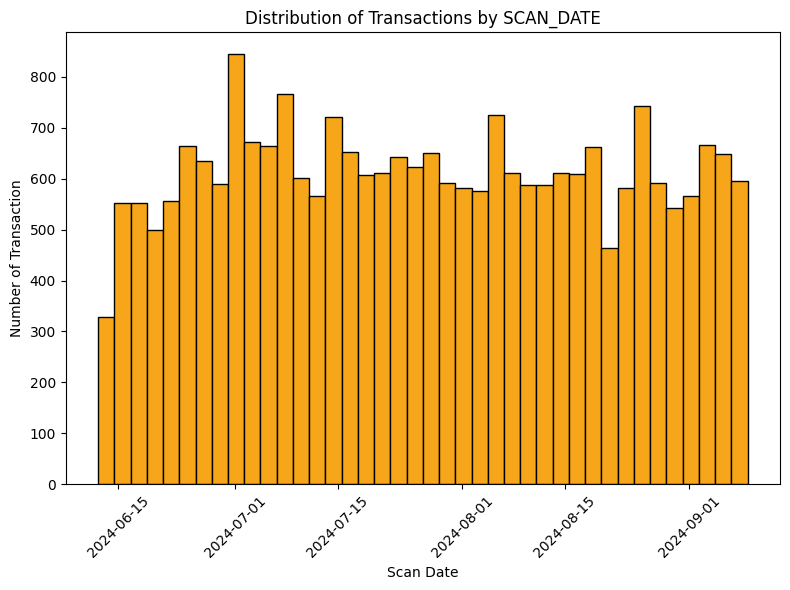

In [29]:
# Transaction: SCAN_DATE
# Create a copy for: Transaction_filtered_final
Transaction_filtered_final_copy = Transaction_filtered_final.copy()

## Convert CREATED_DATE to datetime format
Transaction_filtered_final_copy['SCAN_DATE'] = pd.to_datetime(Transaction_filtered_final_copy['SCAN_DATE'])

## Create a histogram to show the distribution of user creation dates based on each quarter
plt.figure(figsize=(8, 6))
plt.hist(Transaction_filtered_final_copy['SCAN_DATE'], bins=40, color='#f8a619', edgecolor='black')
plt.title('Distribution of Transactions by SCAN_DATE')
plt.xlabel('Scan Date')
plt.ylabel('Number of Transaction')
plt.xticks(rotation=45)
plt.tight_layout()

## Show the plot
plt.show()

In [30]:
# Check the scan date for Transaction data
scan_stat_date = Transaction_filtered_final_copy['SCAN_DATE'].min()
scan_end_date = Transaction_filtered_final_copy['SCAN_DATE'].max()
print(f'This Transaction dataset scan date is from {scan_stat_date} to {scan_end_date}')

This Transaction dataset scan date is from 2024-06-12 06:36:34.910000+00:00 to 2024-09-08 23:07:19.836000+00:00


### Overview - Product

In [31]:
# Quick look of Product data
Product.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [32]:
# Show the User infomation
Product.info()
## There are null values in 4 columns.(CATEGORY_3, CATEGORY_4, MANUFACTURER, BRAND)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


In [33]:
# Check if Product have duplicate
Product.duplicated().sum()

# Drop duplicate rows
Product_cleaned = Product.drop_duplicates()
Product_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 845337 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845226 non-null  object 
 1   CATEGORY_2    843915 non-null  object 
 2   CATEGORY_3    784774 non-null  object 
 3   CATEGORY_4    67453 non-null   object 
 4   MANUFACTURER  618873 non-null  object 
 5   BRAND         618875 non-null  object 
 6   BARCODE       841369 non-null  float64
dtypes: float64(1), object(6)
memory usage: 51.6+ MB


In [69]:
# Create a new product_cleaned data frame which fill the null values in 'BRAND' with 'unknown'
Product_cleaned_2 = Product_cleaned.copy()
Product_cleaned_2['BRAND'] = Product_cleaned_2['BRAND'].fillna('unknown')
Product_cleaned_2.info()

# Create Product_cleaned_3, which filter out the missing values from BARCODE
Product_cleaned_3 = Product_cleaned_2[Product_cleaned_2['BARCODE'].isnull() == False]

<class 'pandas.core.frame.DataFrame'>
Index: 845337 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845226 non-null  object 
 1   CATEGORY_2    843915 non-null  object 
 2   CATEGORY_3    784774 non-null  object 
 3   CATEGORY_4    67453 non-null   object 
 4   MANUFACTURER  618873 non-null  object 
 5   BRAND         845337 non-null  object 
 6   BARCODE       841369 non-null  float64
dtypes: float64(1), object(6)
memory usage: 51.6+ MB


In [70]:
# Product: brand
# Check if brand name in Product dataset have integrity issues
# Group by 'BRAND' and calculate the number of unique 'CATEGORY_1' values
count_category_1_by_brand = Product_cleaned_3.groupby('BRAND')['CATEGORY_1'].nunique()

# Convert the Series to a DataFrame, rename the column, sort values, and reset index
count_category_1_by_brand = count_category_1_by_brand.reset_index(name='count_category_1').sort_values('count_category_1', ascending=False)

# Create a new dataframe to save the brands which have multiple categories
brand_have_multiple_category = count_category_1_by_brand[count_category_1_by_brand['count_category_1'] != 1]

# 
brand_have_multiple_category.head(100)

,BRAND,count_category_1
5637,POLAR,22
1485,COCA-COLA,16
5488,PEPSI,10
1333,CHEERIOS,9
1574,COORS LIGHT,9
...,...,...
3064,GROVE CO.,2
3073,GUESS APPAREL,2
3229,HEMP BOMBS,2
3149,HARRIS TEETER BRAND,2


In [96]:
# Check if products whose brand are 'DOVE' are from the same brand
print(Product_cleaned_3['CATEGORY_1'][Product_cleaned_3['BRAND'] == 'DOVE'].unique())

# Further check the product details
# Check what kind of Dove's products in 'Health & Wellness' caegory
print(Product_cleaned_3[(Product_cleaned_3['BRAND'] == 'DOVE') & (Product_cleaned_3['CATEGORY_1'] == 'Health & Wellness')].head())

print('='*100)
# Check what kind of Dove's products in 'Snacks' caegory
print(Product_cleaned_3[(Product_cleaned_3['BRAND'] == 'DOVE') & (Product_cleaned_3['CATEGORY_1'] == 'Snacks')].head())

# It turned out products whose brand name are 'DOVE' in different categories indicate different company. 
# This kind of integrity issues can possibly cause data integrity issues if we do not know that the same brand name can indicate different companies

['Health & Wellness' 'Snacks']
             CATEGORY_1   CATEGORY_2              CATEGORY_3 CATEGORY_4  \
77    Health & Wellness  Bath & Body    Hand Sanitizer Wipes        NaN   
93    Health & Wellness  Bath & Body  Bath Sponges & Loofahs        NaN   
201   Health & Wellness    Hair Care             Conditioner        NaN   
417   Health & Wellness    Hair Care             Conditioner        NaN   
1114  Health & Wellness    Hair Care             Conditioner        NaN   

     MANUFACTURER BRAND       BARCODE  
77       UNILEVER  DOVE  7.076382e+11  
93       UNILEVER  DOVE  1.004127e+11  
201      UNILEVER  DOVE  7.940048e+10  
417      UNILEVER  DOVE  7.940045e+10  
1114     UNILEVER  DOVE  5.455343e+11  
      CATEGORY_1 CATEGORY_2       CATEGORY_3 CATEGORY_4 MANUFACTURER BRAND  \
5323      Snacks      Candy  Chocolate Candy        NaN     UNILEVER  DOVE   
41308     Snacks      Candy  Chocolate Candy        NaN     UNILEVER  DOVE   
56111     Snacks      Candy  Chocolate Candy

In [34]:
# Count the number of products based on their categories
category_counts = Product_cleaned.groupby(['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4'])['BARCODE'].nunique()\
    .reset_index(name='Distinct Count').sort_values(by='Distinct Count', ascending=False)

# Show the top 20 result
category_counts.head(20)

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,Distinct Count
82,Health & Wellness,Skin Care,Lip Balms & Treatments,Lip Balms,9712
123,Snacks,Puffed Snacks,Popcorn,Already Popped Popcorn,6956
80,Health & Wellness,Medicines & Treatments,Sleeping & Snoring,Sleep Aids,4968
58,Health & Wellness,Hair Care,Hair Tools,Hair Brushes & Combs,4720
66,Health & Wellness,Hair Removal,Shaving Gel & Cream,Women's Shaving Gel & Cream,3871
62,Health & Wellness,Hair Removal,Razors,Men's Razors,2833
76,Health & Wellness,Medicines & Treatments,Digestive Health Medicines & Treatments,Heartburn & Antacids Medicines & Treatments,2747
74,Health & Wellness,Medicines & Treatments,Digestive Health Medicines & Treatments,Constipation Relief Medicines & Treatments,2733
70,Health & Wellness,Medicines & Treatments,Cough & Cold Medicines & Treatments,Immune Support,2675
124,Snacks,Puffed Snacks,Popcorn,Microwave Popcorn,2308


### 3 tables join to each other

In [35]:
# Transaction & User
Transaction_User = pd.merge(Transaction_filtered_final, User, left_on='USER_ID', right_on='ID')
Transaction_User.info()
# There are 100000 entries in User dataset, but merge with Transaction dataset, there are only 130 entries are matching.
# It implies that most of the user information in Transaction dataset is not provided in User dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   RECEIPT_ID      130 non-null    object             
 1   PURCHASE_DATE   130 non-null    object             
 2   SCAN_DATE       130 non-null    object             
 3   STORE_NAME      130 non-null    object             
 4   USER_ID         130 non-null    object             
 5   BARCODE         119 non-null    float64            
 6   FINAL_QUANTITY  130 non-null    object             
 7   FINAL_SALE      130 non-null    object             
 8   ID              130 non-null    object             
 9   CREATED_DATE    130 non-null    datetime64[ns, UTC]
 10  BIRTH_DATE      129 non-null    object             
 11  STATE           130 non-null    object             
 12  LANGUAGE        130 non-null    object             
 13  GENDER          129 non-null    obj

In [36]:
# Transaction & Product
# Merge two data sets
Transaction_Product = pd.merge(Transaction_filtered_final, Product_cleaned_3, how='left', on='BARCODE')
Transaction_Product.info()

<class 'pandas.core.frame.DataFrame'>
Index: 845337 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845226 non-null  object 
 1   CATEGORY_2    843915 non-null  object 
 2   CATEGORY_3    784774 non-null  object 
 3   CATEGORY_4    67453 non-null   object 
 4   MANUFACTURER  618873 non-null  object 
 5   BRAND         845337 non-null  object 
 6   BARCODE       841369 non-null  float64
dtypes: float64(1), object(6)
memory usage: 51.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24540 entries, 0 to 24539
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      24540 non-null  object 
 1   PURCHASE_DATE   24540 non-null  object 
 2   SCAN_DATE       24540 non-null  object 
 3   STORE_NAME      24540 non-null  object 
 4   USER_ID         24540 non-null  object 
 5   BARCODE         2

In [37]:
# Transaction & Product & User
Transaction_Product_User = pd.merge(Transaction_Product, User, left_on='USER_ID', right_on='ID')
Transaction_Product_User.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   RECEIPT_ID      130 non-null    object             
 1   PURCHASE_DATE   130 non-null    object             
 2   SCAN_DATE       130 non-null    object             
 3   STORE_NAME      130 non-null    object             
 4   USER_ID         130 non-null    object             
 5   BARCODE         119 non-null    float64            
 6   FINAL_QUANTITY  130 non-null    object             
 7   FINAL_SALE      130 non-null    object             
 8   CATEGORY_1      72 non-null     object             
 9   CATEGORY_2      72 non-null     object             
 10  CATEGORY_3      66 non-null     object             
 11  CATEGORY_4      7 non-null      object             
 12  MANUFACTURER    69 non-null     object             
 13  BRAND           72 non-null     obj

In [38]:
# delete
Transaction_Product_User.groupby('BRAND')['RECEIPT_ID'].count().sort_values(ascending=False)

BRAND
unknown                          3
NERDS CANDY                      3
DOVE                             3
MEIJER                           2
TRIDENT                          2
GREAT VALUE                      2
COCA-COLA                        2
HERSHEY'S                        2
SOUR PATCH KIDS                  2
PEPPERIDGE FARM                  1
PEPSI                            1
OREO                             1
QUAKER                           1
ORAL-B                           1
OLD SPICE                        1
NUTTER BUTTER                    1
NABISCO                          1
PRINGLES                         1
RUFFLES                          1
REESE SPECIALTY FOODS            1
REESE'S                          1
SARGENTO                         1
SKITTLES                         1
SNICKERS                         1
SNYDERS OF HANOVER               1
SPEED STICK                      1
SUAVE                            1
TOSTITOS                         1
TRESEMMÉ      

In [39]:
transaction_category_counts = Transaction_Product.groupby(['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3'])['BARCODE'].count()\
    .reset_index(name='Count').sort_values(by='Count', ascending=False).reset_index()
transaction_category_counts.head(20)

,index,CATEGORY_1,CATEGORY_2,CATEGORY_3,Count
0,122,Snacks,Candy,Chocolate Candy,1057
1,7,Beverages,Carbonated Soft Drinks,Cola,708
2,123,Snacks,Candy,Confection Candy,666
3,130,Snacks,Chips,Potato Chips,635
4,131,Snacks,Chips,Tortilla Chips,401
5,178,Snacks,Puffed Snacks,Cheese Curls & Puffs,290
6,186,Snacks,Snack Cakes,Cakes & Truffles Snack Cakes,268
7,91,Health & Wellness,Oral Care,Toothpaste,211
8,77,Health & Wellness,Medicines & Treatments,Vitamins & Herbal Supplements,206
9,135,Snacks,Crackers,Cheese Crackers,193


In [40]:
Transaction_Product[Transaction_Product['CATEGORY_1'] == 'Health & Wellness'].groupby('BRAND')['RECEIPT_ID'].count().sort_values(ascending=False)

BRAND
EQUATE              340
DOVE                141
COLGATE             126
CREST               111
unknown             100
                   ... 
PARENT'S CHOICE       1
PAUL MITCHELL         1
FIRST AID BEAUTY      1
FIBER ADVANCE         1
LA ROCHE-POSAY        1
Name: RECEIPT_ID, Length: 472, dtype: int64

# Second: provide SQL queries
In this section, I will use spark sql and the data cleaned in section 1 to answer the three questions.

* Closed-ended questions:
1. What are the top 5 brands by receipts scanned among users 21 and over?
2. What are the top 5 brands by sales among users that have had their account for at least six months?
3. What is the percentage of sales in the Health & Wellness category by generation?
* Open-ended questions: for these, make assumptions and clearly state them when answering the question.
1. Who are Fetch’s power users?
2. Which is the leading brand in the Dips & Salsa category?
3. At what percent has Fetch grown year over year?

## pyspark.sql setting

In [41]:
# import pyspark and pyspark.sql
import pyspark
from pyspark.sql import SparkSession

In [42]:
# Create a Spark session with name as 'Fetch_take_home_assessment'
spark = SparkSession.builder \
    .appName('Fetch_take_home_assessment') \
    .getOrCreate()

# Confirm the Spark session is created
print("Spark session created:", spark)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/30 15:31:41 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Spark session created: <pyspark.sql.session.SparkSession object at 0x1436c7be0>


## Data Loading
* Convert the pandas dataframe to a spark dataframe

In [43]:
User['BIRTH_DATE'] = User['BIRTH_DATE'].astype(str)
User['CREATED_DATE'] = User['CREATED_DATE'].astype(str)

In [102]:
# User
User_spark = spark.createDataFrame(User) 
User_spark.createOrReplaceTempView('User')

# Quick look for User in spark
spark.sql('''SELECT * 
          FROM User
          LIMIT 5''').show()

+--------------------+--------------------+--------------------+-----+--------+------+
|                  ID|        CREATED_DATE|          BIRTH_DATE|STATE|LANGUAGE|GENDER|
+--------------------+--------------------+--------------------+-----+--------+------+
|5ef3b4f17053ab141...|2020-06-24 20:17:...|2000-08-11 00:00:...|   CA|  es-419|female|
|5ff220d383fcfc126...|2021-01-03 19:53:...|2001-09-24 04:00:...|   PA|      en|female|
|6477950aa55bb77a0...|2023-05-31 18:42:...|1994-10-28 00:00:...|   FL|  es-419|female|
|658a306e99b40f103...|2023-12-26 01:46:...|                 NaN|   NC|      en|   NaN|
|653cf5d6a225ea102...|2023-10-28 11:51:...|1972-03-19 00:00:...|   PA|      en|female|
+--------------------+--------------------+--------------------+-----+--------+------+



In [45]:
# Transaction_filtered_final: I use the cleanred Transaction which filtered duplicates and some unreasonable values
Transaction_spark = spark.createDataFrame(Transaction_filtered_final) 
Transaction_spark.createOrReplaceTempView('Transaction_filtered_final')

# Quick look for Transaction_filtered_final in spark
spark.sql('''SELECT * 
          FROM Transaction_filtered_final
          LIMIT 5''').show()

+--------------------+-------------+--------------------+--------------------+--------------------+----------------+--------------+----------+
|          RECEIPT_ID|PURCHASE_DATE|           SCAN_DATE|          STORE_NAME|             USER_ID|         BARCODE|FINAL_QUANTITY|FINAL_SALE|
+--------------------+-------------+--------------------+--------------------+--------------------+----------------+--------------+----------+
|7b3ec72d-9d30-40b...|   2024-08-20|2024-08-20 11:17:...|DOLLAR GENERAL STORE|60fc1e6deb7585430...|7.45527114884E11|          1.00|      1.65|
|04869b68-29e3-4e8...|   2024-08-05|2024-08-09 16:06:...|DOLLAR GENERAL STORE|654cf234a225ea102...|7.45527114884E11|          1.00|      1.65|
|f1a96308-24a5-46a...|   2024-09-03|2024-09-03 11:28:...|             WALMART|63c1cb6d3d310dcee...| 3.7000828761E10|          1.00|     28.22|
|7ee1798e-fd2e-427...|   2024-08-30|2024-09-04 12:53:...|DOLLAR GENERAL STORE|65c29b137050d0a62...| 1.2000504051E10|          1.00|      5.25|

In [46]:
# Product_cleaned: I use the cleaned Product (Product_cleaned) which dropped the duplicates
Product_spark = spark.createDataFrame(Product_cleaned_3)
Product_spark.createOrReplaceTempView('Product_cleaned_3')

# Quick look for Transaction_filtered_final in spark
spark.sql('''SELECT * 
          FROM Product_cleaned_3
          LIMIT 5''').show()

24/10/30 15:32:03 WARN TaskSetManager: Stage 2 contains a task of very large size (3854 KiB). The maximum recommended task size is 1000 KiB.


+-----------------+--------------------+--------------------+----------+--------------------+---------------+----------------+
|       CATEGORY_1|          CATEGORY_2|          CATEGORY_3|CATEGORY_4|        MANUFACTURER|          BRAND|         BARCODE|
+-----------------+--------------------+--------------------+----------+--------------------+---------------+----------------+
|Health & Wellness|       Sexual Health|Conductivity Gels...|       NaN|                 NaN|        unknown| 7.9649440782E11|
|           Snacks|       Puffed Snacks|Cheese Curls & Puffs|       NaN|                 NaN|        unknown| 2.3278011028E10|
|Health & Wellness|           Hair Care|Hair Care Accesso...|       NaN|PLACEHOLDER MANUF...|        ELECSOP|4.61817824225E11|
|Health & Wellness|           Oral Care|          Toothpaste|       NaN|   COLGATE-PALMOLIVE|        COLGATE| 3.5000466815E10|
|Health & Wellness|Medicines & Treat...|      Essential Oils|       NaN|MAPLE HOLISTICS A...|MAPLE HOLISTICS|8.

24/10/30 15:32:07 WARN PythonRunner: Detected deadlock while completing task 0.0 in stage 2 (TID 2): Attempting to kill Python Worker


### Closed-ended questions

#### What are the top 5 brands by receipts scanned among users 21 and over?

In [103]:
# What are the top 5 brands by receipts scanned among users 21 and over?
spark.sql('''
-- Select the Target_user who are 21 and over
WITH Target_user AS (
  SELECT u2.id, u2.age
  FROM (
    SELECT u1.id,
           CAST(DATEDIFF(current_date(), u1.birth_date) / 365 AS INT) AS age
    FROM User u1
  ) AS u2
  WHERE u2.age >= 21
)
SELECT p.brand, COUNT(DISTINCT t.receipt_id) AS count_of_receipts
FROM Transaction_filtered_final t 
INNER JOIN Target_user tu ON t.user_id = tu.id
LEFT JOIN Product_cleaned_3 p ON t.barcode = p.barcode
GROUP BY p.brand
HAVING p.brand IS NOT NULL
          AND p.brand <> 'unknown'
ORDER BY count_of_receipts DESC
LIMIT 5
''').show()

24/10/30 16:18:05 WARN TaskSetManager: Stage 109 contains a task of very large size (3853 KiB). The maximum recommended task size is 1000 KiB.


+-----------+-----------------+
|      brand|count_of_receipts|
+-----------+-----------------+
|NERDS CANDY|                3|
|       DOVE|                3|
|GREAT VALUE|                2|
|     MEIJER|                2|
|  COCA-COLA|                2|
+-----------+-----------------+



choose 1

In [104]:
# What are the top 5 brands by receipts scanned among users 21 and over? 
spark.sql('''
-- Select the Target_user who are 21 and over
WITH Target_user AS (
  SELECT 
    u1.id,
    CAST(DATEDIFF(current_date(), u1.birth_date) / 365 AS INT) AS age
  FROM 
    User u1
  WHERE 
    CAST(DATEDIFF(current_date(), u1.birth_date) / 365 AS INT) >= 21
), Ranked_Brands AS (
  SELECT 
    p.brand,
    COUNT(DISTINCT t.receipt_id) AS count_of_receipts,
    RANK() OVER (ORDER BY COUNT(DISTINCT t.receipt_id) DESC) AS brand_rank
  FROM 
    Transaction_filtered_final t
  INNER JOIN 
    Target_user tu ON t.user_id = tu.id
  LEFT JOIN 
    Product_cleaned_3 p ON t.barcode = p.barcode
  WHERE 
    p.brand IS NOT NULL
    AND p.brand <> 'unknown'
  GROUP BY 
    p.brand
)
SELECT 
  brand,
  count_of_receipts,
  brand_rank
FROM 
  Ranked_Brands
WHERE 
  brand_rank <= 5
ORDER BY 
  brand_rank;
''').show()

24/10/30 16:18:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/30 16:18:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/30 16:18:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/30 16:18:09 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/30 16:18:09 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/30 16:18:09 WARN TaskSetManager: Stage 128 contains a task of very large size (3853 KiB). The maximum recommended task size is 1000 KiB.
24/10/30 16:18:09 WARN WindowExe

+---------------+-----------------+----------+
|          brand|count_of_receipts|brand_rank|
+---------------+-----------------+----------+
|    NERDS CANDY|                3|         1|
|           DOVE|                3|         1|
|      COCA-COLA|                2|         3|
|         MEIJER|                2|         3|
|        TRIDENT|                2|         3|
|    GREAT VALUE|                2|         3|
|SOUR PATCH KIDS|                2|         3|
|      HERSHEY'S|                2|         3|
+---------------+-----------------+----------+



24/10/30 16:18:09 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/10/30 16:18:09 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


#### What is the percentage of sales in the Health & Wellness category by generation?

In [105]:
# What is the percentage of sales in the Health & Wellness category by generation?
# Generation and age reference: https://www.beresfordresearch.com/age-range-by-generation/
spark.sql('''
-- Calculate users' age and categorize into generations
WITH Generation_group AS (
  SELECT 
    u.ID,
    CASE
      WHEN u.age >= 12 AND u.age < 28 THEN 'Gen Z (12~28)'
      WHEN u.age >= 28 AND u.age < 44 THEN 'Millennials (28~44)' -- Corrected the range in label
      WHEN u.age >= 44 AND u.age < 60 THEN 'Gen X (44~60)'
      WHEN u.age >= 60 THEN 'Boomers (60up)'
    END AS generation
  FROM (
    SELECT 
      ID,
      CAST(DATEDIFF(current_date(), birth_date) / 365 AS INT) AS age
    FROM User
  ) u
), 
-- Select products' BARCODE in Health & Wellness category_1
Product_in_Health_Wellness AS (
  SELECT p1.BARCODE
  FROM Product_cleaned_3 p1
  WHERE p1.CATEGORY_1 = 'Health & Wellness'
),
-- Join transactions with relevant products to filter only Health & Wellness sales and calculate sales by generation
Sales_by_Generation AS (
  SELECT 
    gg.generation,
    ROUND(SUM(t.FINAL_SALE), 2) AS generation_sales
  FROM Transaction_filtered_final t
  INNER JOIN Product_in_Health_Wellness p ON t.BARCODE = p.BARCODE
  INNER JOIN Generation_group gg ON t.USER_ID = gg.ID
  GROUP BY gg.generation
)
-- Calculate total sales and the percentage of total sales by generation
SELECT 
  generation,
  generation_sales,
  (SELECT ROUND(SUM(generation_sales), 2) FROM Sales_by_Generation) AS total_sales,
  CONCAT(ROUND((generation_sales / (SELECT SUM(generation_sales) FROM Sales_by_Generation)) * 100, 2), '%') AS percentage_of_sales
FROM 
  Sales_by_Generation
ORDER BY 
  (generation_sales / (SELECT SUM(generation_sales) FROM Sales_by_Generation)) DESC
''').show()

24/10/30 16:18:13 WARN TaskSetManager: Stage 151 contains a task of very large size (3853 KiB). The maximum recommended task size is 1000 KiB.


+-------------------+----------------+-----------+-------------------+
|         generation|generation_sales|total_sales|percentage_of_sales|
+-------------------+----------------+-----------+-------------------+
|     Boomers (60up)|           84.09|     159.54|             52.71%|
|      Gen X (44~60)|           40.28|     159.54|             25.25%|
|Millennials (28~44)|           35.17|     159.54|             22.04%|
+-------------------+----------------+-----------+-------------------+



### Open-ended questions
*  for these, make assumptions and clearly state them when answering the question.

#### Which is the leading brand in the Dips & Salsa category?
* For this question, I assume that leading brand means having the most sale in the transaction data, which is from Jun 12, 2024 to Sep 08, 2024
* The reason I use multiple CTE here instead of using LIMIT 1 is because it is possible that multiple brands have the same sales which might all be maximum. If using LIMIT 1, then there might be some brands missing by that. That's why the queries here can ensure to avoid this kind of mistakes.

In [50]:
# Which is the leading brand in the Dips & Salsa category?
spark.sql('''
-- Calculate the sales for each brand in 'Dip & Salsa' category
WITH Dip_Salsa_sales AS (
    SELECT 
        p.BRAND, 
        ROUND(SUM(t.FINAL_SALE), 2) AS total_sale
    FROM 
        Transaction_filtered_final t 
    LEFT JOIN 
        Product_cleaned_3 p ON t.BARCODE = p.BARCODE
    WHERE 
        p.CATEGORY_2 = 'Dips & Salsa'
        AND p.BRAND <> 'unknown'
    GROUP BY 
        p.BRAND
),
-- Select the max sale from Dip_Salsa_sales
Max_Sale AS (
    SELECT 
        MAX(total_sale) AS max_sale
    FROM 
        Dip_Salsa_sales
)
-- Select all brands with total sales equal to the maximum found total sales
SELECT 
    d.BRAND,
    d.total_sale
FROM 
    Dip_Salsa_sales d, Max_Sale ms
WHERE d.total_sale = ms.max_sale;
''').show()

24/10/30 15:32:12 WARN TaskSetManager: Stage 76 contains a task of very large size (3853 KiB). The maximum recommended task size is 1000 KiB.


+--------+----------+
|   BRAND|total_sale|
+--------+----------+
|TOSTITOS|     181.3|
+--------+----------+



In [51]:
spark.sql('''SELECT 
    p.BRAND, 
    date_format(t.PURCHASE_DATE, 'yyyy-MM') AS Purchase_Month,
    ROUND(SUM(t.FINAL_SALE), 2) AS Total_Sale
FROM 
    Transaction_filtered_final t 
LEFT JOIN 
    Product_cleaned_3 p 
ON 
    t.BARCODE = p.BARCODE
WHERE 
    p.CATEGORY_2 = 'Dips & Salsa' -- Corrected to use '=' for comparison
    AND p.BRAND <> 'unknown'
GROUP BY 
    p.BRAND, 
    date_format(t.PURCHASE_DATE, 'yyyy-MM')
ORDER BY 
    Total_Sale DESC, BRAND, Purchase_Month ASC;
''').show()

24/10/30 15:32:13 WARN TaskSetManager: Stage 92 contains a task of very large size (3853 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+--------------+----------+
|               BRAND|Purchase_Month|Total_Sale|
+--------------------+--------------+----------+
|            TOSTITOS|       2024-07|     70.67|
|            TOSTITOS|       2024-08|     60.16|
|                PACE|       2024-08|     51.88|
|          GOOD FOODS|       2024-08|     43.96|
|            TOSTITOS|       2024-06|     40.52|
|          GOOD FOODS|       2024-09|     34.97|
|          MARKETSIDE|       2024-07|     33.42|
|              FRITOS|       2024-06|     31.15|
|        HELUVA GOOD!|       2024-07|     30.46|
|          MARKETSIDE|       2024-08|     28.32|
|  KIRKLAND SIGNATURE|       2024-07|     27.98|
|FRESHNESS GUARANTEED|       2024-08|     26.06|
|    DEAN'S DAIRY DIP|       2024-07|     25.99|
|            MARZETTI|       2024-07|     25.69|
|               LAY'S|       2024-07|     23.15|
|        HELUVA GOOD!|       2024-06|     21.55|
|       HIDDEN VALLEY|       2024-06|     20.68|
|              FRITO

In [52]:
spark.sql('''
SELECT p.CATEGORY_1, p.CATEGORY_2, p.CATEGORY_3, p.CATEGORY_4, COUNT(DISTINCT p.barcode)
FROM Product_cleaned_3 p
WHERE p.brand == 'TOSTITOS'
GROUP BY p.CATEGORY_1, p.CATEGORY_2, p.CATEGORY_3, p.CATEGORY_4
ORDER BY COUNT(DISTINCT p.barcode) DESC
LIMIT 20
''').show()

24/10/30 15:32:14 WARN TaskSetManager: Stage 100 contains a task of very large size (3853 KiB). The maximum recommended task size is 1000 KiB.


+----------+-------------+--------------------+----------+-----------------------+
|CATEGORY_1|   CATEGORY_2|          CATEGORY_3|CATEGORY_4|count(DISTINCT barcode)|
+----------+-------------+--------------------+----------+-----------------------+
|    Snacks|        Chips|      Tortilla Chips|       NaN|                    272|
|    Snacks| Dips & Salsa|               Salsa|       NaN|                     74|
|    Snacks| Dips & Salsa|          Cheese Dip|       NaN|                     45|
|    Snacks| Dips & Salsa|           Dip Mixes|       NaN|                     14|
|    Snacks| Dips & Salsa|          Other Dips|       NaN|                      6|
|    Snacks|        Chips|  Bagel & Pita Chips|       NaN|                      4|
|    Snacks| Dips & Salsa|            Bean Dip|       NaN|                      3|
|    Snacks|        Chips|              Crisps|       NaN|                      2|
|    Snacks| Dips & Salsa|           Ranch Dip|       NaN|                      2|
|   

# Third: communicate with stakeholders
* Construct an email or slack message that is understandable to a product or business leader who is not familiar with your day-to-day work. Summarize the results of your investigation. Include:
1. Key data quality issues and outstanding questions about the data
2. One interesting trend in the data
    * Use a finding from part 2 or come up with a new insight
3. Request for action: explain what additional help, info, etc. you need to make sense of the data and resolve any outstanding issues

In [175]:
# Calculate the total sale and average daily sale for 'DOVE'(Health & Wellness) to see the trend
spark.sql('''
WITH Dove_sale AS (
    SELECT 
        p.BRAND, 
        date_format(t.PURCHASE_DATE, 'yyyy-MM') AS Purchase_Month,
        ROUND(SUM(t.FINAL_SALE), 2) AS Total_Sale
    FROM 
        Transaction_filtered_final t 
    LEFT JOIN 
        Product_cleaned_3 p ON t.BARCODE = p.BARCODE
    WHERE 
        p.CATEGORY_1 = 'Health & Wellness'
        AND p.BRAND = 'DOVE'
    GROUP BY 
        p.BRAND, 
        date_format(t.PURCHASE_DATE, 'yyyy-MM')
)
SELECT
    ds.BRAND,
    ds.Purchase_Month,
    ds.Total_Sale,
    CASE 
        WHEN ds.Purchase_Month = '2024-06' THEN ROUND(ds.Total_Sale / 19, 2) -- Since the transaction data is from June 12
        WHEN ds.Purchase_Month = '2024-09' THEN ROUND(ds.Total_Sale / 8, 2) -- Since the transaction data is unitl Sep 08
        ELSE ROUND(ds.Total_Sale / 30, 2)  -- For July & August
    END AS Avg_Daily_Sale
FROM 
    Dove_sale ds
ORDER BY 
    ds.Purchase_Month ASC;
''').show()

24/10/30 17:32:20 WARN TaskSetManager: Stage 351 contains a task of very large size (3853 KiB). The maximum recommended task size is 1000 KiB.


+-----+--------------+----------+--------------+
|BRAND|Purchase_Month|Total_Sale|Avg_Daily_Sale|
+-----+--------------+----------+--------------+
| DOVE|       2024-06|    269.28|         14.17|
| DOVE|       2024-07|    548.72|         18.29|
| DOVE|       2024-08|    236.02|          7.87|
| DOVE|       2024-09|     62.36|           7.8|
+-----+--------------+----------+--------------+



In [173]:
# Check in each month, what is the popular products?
spark.sql('''
WITH Dove_sale_Category AS (
    SELECT 
        p.CATEGORY_2,
        p.CATEGORY_3,
        p.CATEGORY_4,
        date_format(t.PURCHASE_DATE, 'yyyy-MM') AS Purchase_Month,
        ROUND(SUM(t.FINAL_SALE), 2) AS Total_Sale,
        ROUND(COUNT(t.RECEIPT_ID), 2) AS Count_of_Sale
    FROM 
        Transaction_filtered_final t 
    LEFT JOIN 
        Product_cleaned_3 p ON t.BARCODE = p.BARCODE
    WHERE 
        p.CATEGORY_1 = 'Health & Wellness'
        AND p.BRAND = 'DOVE'
    GROUP BY 
        p.CATEGORY_2, 
        p.CATEGORY_3, 
        p.CATEGORY_4, 
        date_format(t.PURCHASE_DATE, 'yyyy-MM')
)
SELECT dsc.*
FROM Dove_sale_Category dsc
WHERE dsc.COunt_of_Sale <> 1 -- Filter out those only have 1 count of sale
ORDER BY dsc.Purchase_Month ASC, dsc.Count_of_Sale DESC, dsc.Total_Sale DESC
''').show(100)

24/10/30 17:30:33 WARN TaskSetManager: Stage 333 contains a task of very large size (3853 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+--------------------+----------+--------------+----------+-------------+
|          CATEGORY_2|          CATEGORY_3|CATEGORY_4|Purchase_Month|Total_Sale|Count_of_Sale|
+--------------------+--------------------+----------+--------------+----------+-------------+
|         Bath & Body|           Body Wash|       NaN|       2024-06|    141.18|           13|
|Deodorant & Antip...|Women's Deodorant...|       NaN|       2024-06|     60.78|           10|
|         Bath & Body|            Bar Soap|       NaN|       2024-06|     30.93|            6|
|Deodorant & Antip...|                 NaN|       NaN|       2024-06|     11.98|            2|
|           Hair Care|             Shampoo|       NaN|       2024-06|     11.96|            2|
|         Bath & Body|            Bar Soap|       NaN|       2024-07|    234.51|           25|
|         Bath & Body|           Body Wash|       NaN|       2024-07|    156.57|           18|
|Deodorant & Antip...|Women's Deodorant...|       

In [197]:
# Body Wash
spark.sql('''
WITH Body_Wash_Sale AS (
    SELECT 
        p.CATEGORY_2,
        p.CATEGORY_3,
        p.CATEGORY_4,
        p.BRAND,
        date_format(t.PURCHASE_DATE, 'yyyy-MM') AS Purchase_Month,
        ROUND(SUM(t.FINAL_SALE), 2) AS Total_Sale,
        ROUND(COUNT(t.RECEIPT_ID), 2) AS Count_of_Sale
    FROM 
        Transaction_filtered_final t 
    LEFT JOIN 
        Product_cleaned_3 p ON t.BARCODE = p.BARCODE
    WHERE 
        p.CATEGORY_1 = 'Health & Wellness'
          AND p.CATEGORY_2 = 'Bath & Body'
          AND p.CATEGORY_3 = 'Body Wash'
    GROUP BY 
        p.CATEGORY_2, 
        p.CATEGORY_3, 
        p.CATEGORY_4, 
        p.BRAND,
        date_format(t.PURCHASE_DATE, 'yyyy-MM')
)
SELECT *
FROM Body_Wash_Sale
WHERE Count_of_Sale <> 1 -- Filter out those only have 1 count of sale
ORDER BY Purchase_Month ASC, Total_Sale DESC
''').show(30)

24/10/30 18:01:52 WARN TaskSetManager: Stage 486 contains a task of very large size (3853 KiB). The maximum recommended task size is 1000 KiB.


+-----------+----------+----------+-------------+--------------+----------+-------------+
| CATEGORY_2|CATEGORY_3|CATEGORY_4|        BRAND|Purchase_Month|Total_Sale|Count_of_Sale|
+-----------+----------+----------+-------------+--------------+----------+-------------+
|Bath & Body| Body Wash|       NaN|         DOVE|       2024-06|    141.18|           13|
|Bath & Body| Body Wash|       NaN|    OLD SPICE|       2024-06|     64.21|            9|
|Bath & Body| Body Wash|       NaN|         OLAY|       2024-06|     31.85|            3|
|Bath & Body| Body Wash|       NaN|     SOFTSOAP|       2024-06|     21.19|            4|
|Bath & Body| Body Wash|       NaN|        NIVEA|       2024-06|     17.22|            4|
|Bath & Body| Body Wash|       NaN|          AXE|       2024-06|     16.49|            2|
|Bath & Body| Body Wash|       NaN|      UP & UP|       2024-06|     10.18|            2|
|Bath & Body| Body Wash|       NaN|        SUAVE|       2024-06|      8.91|            3|
|Bath & Bo

In [195]:
# Bar Soap
spark.sql('''
WITH Bar_Soap_Sale AS (
    SELECT 
        p.CATEGORY_2,
        p.CATEGORY_3,
        p.CATEGORY_4,
        p.BRAND,
        date_format(t.PURCHASE_DATE, 'yyyy-MM') AS Purchase_Month,
        ROUND(SUM(t.FINAL_SALE), 2) AS Total_Sale,
        ROUND(COUNT(t.RECEIPT_ID), 2) AS Count_of_Sale
    FROM 
        Transaction_filtered_final t 
    LEFT JOIN 
        Product_cleaned_3 p ON t.BARCODE = p.BARCODE
    WHERE 
        p.CATEGORY_1 = 'Health & Wellness'
          AND p.CATEGORY_2 = 'Bath & Body'
          AND p.CATEGORY_3 = 'Bar Soap'
    GROUP BY 
        p.CATEGORY_2, 
        p.CATEGORY_3, 
        p.CATEGORY_4, 
        p.BRAND,
        date_format(t.PURCHASE_DATE, 'yyyy-MM')
)
SELECT *
FROM Bar_Soap_Sale
WHERE Count_of_Sale <> 1 -- Filter out those only have 1 count of sale
ORDER BY Purchase_Month ASC, Total_Sale DESC
''').show(30)

24/10/30 17:45:10 WARN TaskSetManager: Stage 468 contains a task of very large size (3853 KiB). The maximum recommended task size is 1000 KiB.


+-----------+----------+----------+------------+--------------+----------+-------------+
| CATEGORY_2|CATEGORY_3|CATEGORY_4|       BRAND|Purchase_Month|Total_Sale|Count_of_Sale|
+-----------+----------+----------+------------+--------------+----------+-------------+
|Bath & Body|  Bar Soap|       NaN|        DOVE|       2024-06|     30.93|            6|
|Bath & Body|  Bar Soap|       NaN|        DIAL|       2024-06|     13.36|            3|
|Bath & Body|  Bar Soap|       NaN|        DOVE|       2024-07|    234.51|           25|
|Bath & Body|  Bar Soap|       NaN|      CARESS|       2024-07|      6.42|            2|
|Bath & Body|  Bar Soap|       NaN|        DOVE|       2024-08|     79.62|            9|
|Bath & Body|  Bar Soap|       NaN|        DIAL|       2024-08|     27.92|            7|
|Bath & Body|  Bar Soap|       NaN|IRISH SPRING|       2024-08|     17.08|            2|
|Bath & Body|  Bar Soap|       NaN|      CARESS|       2024-08|     12.67|            3|
|Bath & Body|  Bar So

In [196]:
# Women Deodorant
spark.sql('''
WITH Women_Deodorant AS (
    SELECT 
        p.CATEGORY_2,
        p.CATEGORY_3,
        p.CATEGORY_4,
        p.BRAND,
        date_format(t.PURCHASE_DATE, 'yyyy-MM') AS Purchase_Month,
        ROUND(SUM(t.FINAL_SALE), 2) AS Total_Sale,
        ROUND(COUNT(t.RECEIPT_ID), 2) AS Count_of_Sale
    FROM 
        Transaction_filtered_final t 
    LEFT JOIN 
        Product_cleaned_3 p ON t.BARCODE = p.BARCODE
    WHERE 
        p.CATEGORY_1 = 'Health & Wellness'
          AND p.CATEGORY_2 = 'Deodorant & Antiperspirant'
          AND p.CATEGORY_3 = "Women's Deodorant & Antiperspirant"
    GROUP BY 
        p.CATEGORY_2, 
        p.CATEGORY_3, 
        p.CATEGORY_4, 
        p.BRAND,
        date_format(t.PURCHASE_DATE, 'yyyy-MM')
)
SELECT *
FROM Women_Deodorant
WHERE Count_of_Sale <> 1 -- Filter out those only have 1 count of sale
ORDER BY Purchase_Month ASC, Total_Sale DESC
''').show(30)

24/10/30 17:45:25 WARN TaskSetManager: Stage 477 contains a task of very large size (3853 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+--------------------+----------+-------------+--------------+----------+-------------+
|          CATEGORY_2|          CATEGORY_3|CATEGORY_4|        BRAND|Purchase_Month|Total_Sale|Count_of_Sale|
+--------------------+--------------------+----------+-------------+--------------+----------+-------------+
|Deodorant & Antip...|Women's Deodorant...|       NaN|         DOVE|       2024-06|     60.78|           10|
|Deodorant & Antip...|Women's Deodorant...|       NaN|       SECRET|       2024-06|     45.26|            7|
|Deodorant & Antip...|Women's Deodorant...|       NaN|    OLD SPICE|       2024-06|     27.66|            4|
|Deodorant & Antip...|Women's Deodorant...|       NaN|     GILLETTE|       2024-06|     16.96|            2|
|Deodorant & Antip...|Women's Deodorant...|       NaN|       DEGREE|       2024-06|      9.26|            2|
|Deodorant & Antip...|Women's Deodorant...|       NaN|        SUAVE|       2024-06|      8.43|            4|
|Deodorant & Antip.